# Read and Visualize Geopackage data - GDAM


"GeoPackage (GPKG) is an open, non-proprietary, platform-independent and standards-based data format for geographic information systems built as a set of conventions over a SQLite database. [It was] defined by the Open Geospatial Consortium (OGC)" (Wiki)


---
DTR

# Import Packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
import cartopy.io.img_tiles as cimgt
#Note Stamen basemap will not be available from 31 Oct 2023

In [5]:
import geopandas as gpd

In [6]:
gpd.__version__

'0.13.2'

In [7]:
import fiona

In [8]:
fiona.__version__

'1.9.4'

**NB** The KML driver isn't enabled by default in Fiona, so you have to enable it first

In [9]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

In [10]:
##gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [11]:
import os

## Directory Management

In [12]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

In [13]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/'

In [14]:
# list the files in the directory
#os.listdir(dir_data)

change directory

In [15]:
os.chdir(dir_data)

In [16]:
os.getcwd()

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps'

# Filename

In [17]:
fname_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/gadm41_NLD.gpkg'
fname_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/gadm41_NLD.gpkg'

# Read the data using GeoPandas and Fiona

    1. List the data in the Geopackage file using e.g. fiona or gdal
    2. Open using GeoPandas

In [18]:
gpkg_layers = fiona.listlayers(fname_data)
gpkg_layers

['ADM_ADM_0', 'ADM_ADM_1', 'ADM_ADM_2']

## Read the layers

In [19]:
## Admin Level 1
gdf_GADM_ADM0 = gpd.read_file(fname_data, layer="ADM_ADM_0")

In [20]:
gdf_GADM_ADM0.head()

,GID_0,COUNTRY,geometry
0,NLD,Netherlands,"MULTIPOLYGON (((6.00713 50.75663, 6.00707 50.7..."


In [21]:
len(gdf_GADM_ADM0)

1

In [22]:
gdf_GADM_ADM0.keys()

Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')

In [23]:
## Admin Level 1
gdf_GADM_ADM1 = gpd.read_file(fname_data, layer="ADM_ADM_1")

In [24]:
gdf_GADM_ADM1.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,NLD.1_1,NLD,Netherlands,Drenthe,NA,NA,Provincie,Province,NA,NL.DR,NL-DR,"MULTIPOLYGON (((6.52366 52.64551, 6.52366 52.6..."
1,NLD.2_1,NLD,Netherlands,Flevoland,NA,NA,Provincie,Province,NA,NL.FL,NL-FL,"MULTIPOLYGON (((5.30388 52.31247, 5.28622 52.3..."
2,NLD.3_1,NLD,Netherlands,Fryslân,Friesland,NA,Provincie,Province,NA,NL.FR,NL-FR,"MULTIPOLYGON (((6.23919 52.91320, 6.23615 52.9..."
3,NLD.4_1,NLD,Netherlands,Gelderland,Geldern|Gheldria|Guelders|Gueldr,NA,Provincie,Province,NA,NL.GE,NL-GE,"MULTIPOLYGON (((5.13576 51.73854, 5.13544 51.7..."
4,NLD.5_1,NLD,Netherlands,Groningen,Groninga|Groningue,NA,Provincie,Province,NA,NL.GR,NL-GR,"MULTIPOLYGON (((6.91710 53.01160, 6.91460 53.0..."


In [25]:
len(gdf_GADM_ADM1)

14

In [26]:
gdf_GADM_ADM1.keys()

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')

read level 1 data

In [27]:
## Admin Level 1
gdf_GADM_ADM2 = gpd.read_file(fname_data, layer="ADM_ADM_2")

In [28]:
gdf_GADM_ADM2.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Aa en Hunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"MULTIPOLYGON (((6.56990 52.94651, 6.57448 52.9..."
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"MULTIPOLYGON (((6.64079 53.02571, 6.63922 53.0..."
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"MULTIPOLYGON (((6.74567 52.87925, 6.74431 52.8..."
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"MULTIPOLYGON (((6.87156 52.65302, 6.87122 52.6..."
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,De Wolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"MULTIPOLYGON (((6.27322 52.66813, 6.27347 52.6..."


In [29]:
len(gdf_GADM_ADM2)

355

In [30]:
gdf_GADM_ADM2.keys()

Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')

# Quick view

<Axes: >

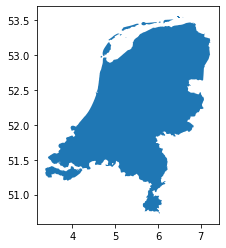

In [31]:
gdf_GADM_ADM0.plot()#[0]

<Axes: >

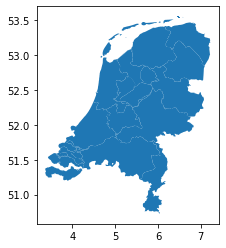

In [32]:
gdf_GADM_ADM1.plot()

<Axes: >

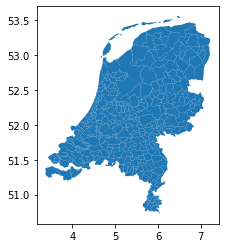

In [33]:
gdf_GADM_ADM2.plot()

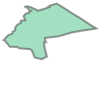

In [34]:
gdf_GADM_ADM2["geometry"][0] #sub-level

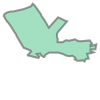

In [35]:
gdf_GADM_ADM2["geometry"][7]

# Plot using cartopy

## Level 0

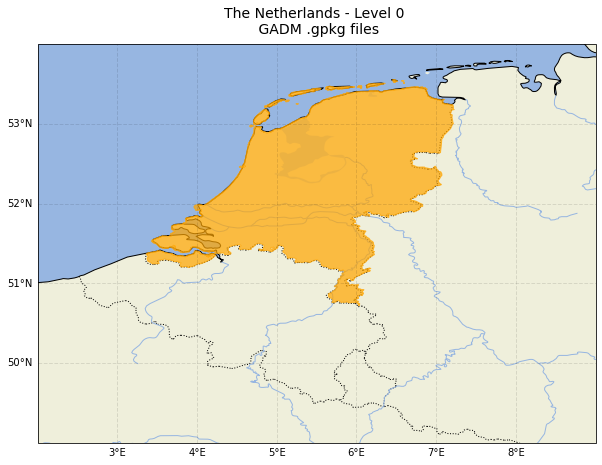

In [36]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([2., 9, 49, 54], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
#ax.add_image(stamen_terrain, 8)

### add data
ax.add_geometries(gdf_GADM_ADM0["geometry"], crs=ccrs.PlateCarree(), color='orange', alpha=0.7)

###### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('The Netherlands - Level 0 \n GADM .gpkg files',
             fontsize = 14,
             y=1.01)
### show

plt.show()

## Level 2

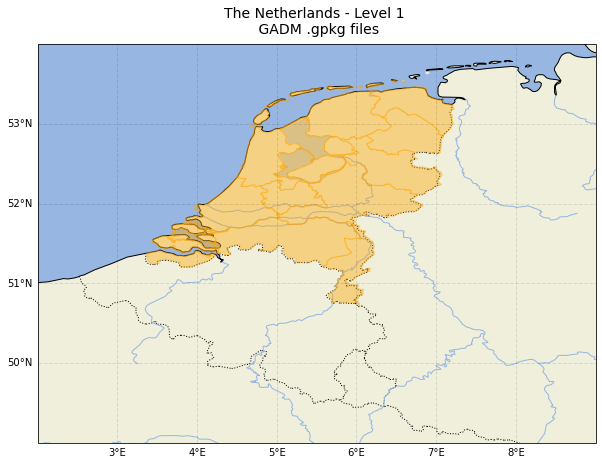

In [41]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([2, 9, 49, 54], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add data
ax.add_geometries(gdf_GADM_ADM1["geometry"], crs=ccrs.PlateCarree(), color='orange', alpha=0.4  )

#gdf_geoJSON.plot(ax=ax, linewidth=5 , figsize=(12, 8))

##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('The Netherlands - Level 1 \n GADM .gpkg files',
             fontsize = 14,
             y=1.01)
#show
plt.show()

## Level 2

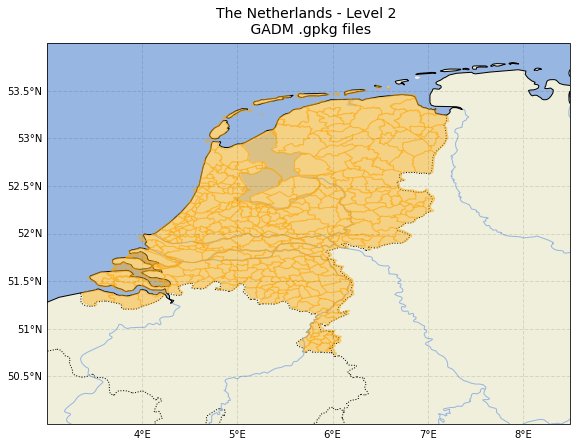

In [38]:
fig = plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([3, 8.5, 50, 54], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
#ax.add_image(stamen_terrain, 8)

### add data
ax.add_geometries(gdf_GADM_ADM2["geometry"], crs=ccrs.PlateCarree(), color='orange', alpha=0.4  )

#gdf_geoJSON.plot(ax=ax, linewidth=5 , figsize=(12, 8))

##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('The Netherlands - Level 2 \n GADM .gpkg files',
             fontsize = 14,
             y=1.01)
## show
plt.show()